In [1]:
from functions import *
import argparse
import h5py
import numpy as np

import time
time0=time.time()

#arguments
# parser = argparse.ArgumentParser()
# # parser.add_argument('-masses', action='store_true', help="calculate only masses")
# # parser.add_argument('-isos', action='store_true', help="calculate only isos")
# parser.add_argument("resolution", help="resolution of maps at which to make measurements",
#                     choices=['quick', 'highres'])
# args = parser.parse_args()
#
# #resolution argument
# resolution=args.resolution


components = 'cen'

xray_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/CC/xray_clusterfinder_tng300_100.hdf5'
maps_file_highres = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/CC/galaxies_stellarmaps_hr_11.2_tng300_072.hdf5'
maps_file_quick= '/Users/fardila/Documents/GitHub/HSC_vs_hydro/CC/galaxies_stellarmaps_lr_11.2_tng300_072.hdf5'


f = h5py.File(xray_file, 'r')
xray_ids = np.array(f['catgrp_id'])
f.close()


f = h5py.File(maps_file_highres, 'r')
all_map_indexes = range(len(np.array(f['catgrp_is_primary'])))
mask = np.in1d(np.array(f['catgrp_id']), xray_ids) & np.array(f['catgrp_is_primary'])
maps_indexes_to_use = np.array(all_map_indexes)[mask]

print(maps_indexes_to_use)
f.close()


Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |
      |                   STSDAS Version 3.18.3                  

In [2]:
resolution='quick'
# isos_tng = [get_iso(maps_file_quick, 'TNG300', resolution, intMode='mean',
# #                     components=components, gal_n=i) for i in maps_indexes_to_use]
# masses_tng = [get_masses(isos_tng[i], maps_file_quick, 'TNG', resolution,
#                          rs=[300, 500, 800], gal_n=i) for i in maps_indexes_to_use]

In [3]:
outfile_loc = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/CC/'
masses = load_pkl(outfile_loc+'CC_TNG300_masses_{0}_{1}.pkl'.format(components,
                                                     resolution))

In [4]:
m10 = np.array([m[0] for m in masses])
m100 = np.array([m[4] for m in masses])

### define Cool Core 

In [5]:
f = h5py.File(xray_file, 'r')
CC_mask1 = np.any(np.array(f['Ne_0p012R500_Sim'])>0.015, axis=1)
CC_mask2 = np.any(np.array(f['Tcool_0p012R500_Sim'])<1, axis=1)
CC_mask3 = np.any(np.array(f['Kcen_Sim'])<30, axis=1)
CC_mask4 = np.any(np.array(f['Csb_phys_Sim'])>0.155, axis=1)
CC_mask5 = np.any(np.array(f['Csb_scal_Sim'])>0.5, axis=1)
CC_mask6 = np.any(np.array(f['Alpha_0p04R500_Sim'])>0.75, axis=1)
MCC_mask = np.any(np.array((f['Alpha_0p04R500_Sim'])<=0.75)&(np.array(f['Alpha_0p04R500_Sim'])>0.5), axis=1)
                            
M500 = np.array([m[0] for m in f['M500_Sim']])
f.close()

In [43]:
len(np.any(CC_mask, axis=1))

196

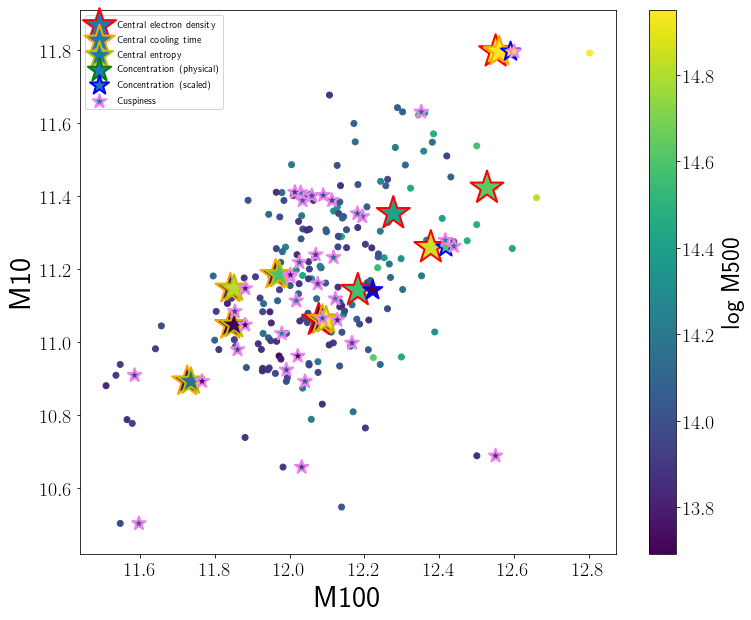

In [14]:
plt.figure(figsize=[12,10])
plt.tick_params(axis='both', which='major', labelsize=20)

# plt.scatter(m100[CC_mask],m10[CC_mask], c=np.log10(M500)[CC_mask], s=100)
non_CC = plt.scatter(m100,m10, c=np.log10(M500))
plt.scatter(m100[CC_mask1],m10[CC_mask1], marker='*', c=np.log10(M500)[CC_mask1], s=1200, edgecolors='r',
            linewidths=2, label='Central electron density')
plt.scatter(m100[CC_mask2]+0.01,m10[CC_mask2], marker='*', c=np.log10(M500)[CC_mask2], s=1000, edgecolors='orange',
            linewidths=2, label='Central cooling time')
plt.scatter(m100[CC_mask3]+0.02,m10[CC_mask3], marker='*', c=np.log10(M500)[CC_mask3], s=800, edgecolors='y',
            linewidths=2, label='Central entropy')
plt.scatter(m100[CC_mask4]+0.03,m10[CC_mask4], marker='*', c=np.log10(M500)[CC_mask4], s=600, edgecolors='g',
            linewidths=2, label='Concentration (physical)')
plt.scatter(m100[CC_mask5]+0.04,m10[CC_mask5], marker='*', c=np.log10(M500)[CC_mask5], s=400, edgecolors='b',
            linewidths=2, label='Concentration (scaled)')
plt.scatter(m100[CC_mask6]+0.05,m10[CC_mask6], marker='*', c=np.log10(M500)[CC_mask6], s=200, edgecolors='violet',
            linewidths=2, label='Cuspiness')


cb = plt.colorbar(non_CC)
cb.set_label('log M500', size=25)
cb.ax.tick_params(labelsize=20) 

plt.xlabel('M100', fontsize=30)
plt.ylabel('M10', fontsize=30)

plt.legend()

plt.show()

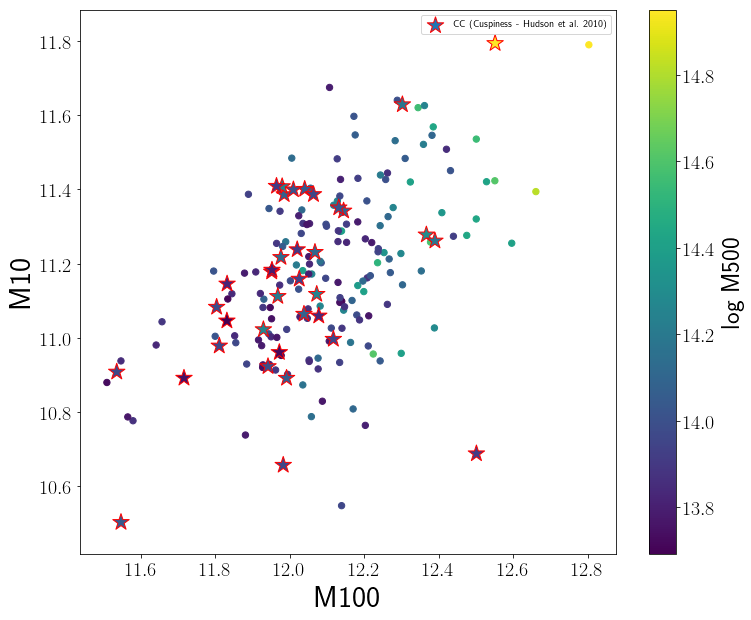

In [16]:
plt.figure(figsize=[12,10])
plt.tick_params(axis='both', which='major', labelsize=20)

all_gals = plt.scatter(m100,m10, c=np.log10(M500), s=1)
non_CC = plt.scatter(m100[~CC_mask6],m10[~CC_mask6], c=np.log10(M500)[~CC_mask6], s=40)

plt.scatter(m100[CC_mask6],m10[CC_mask6], marker='*', c=np.log10(M500)[CC_mask6], s=300, edgecolors='r',
            linewidths=1, label='CC (Cuspiness - Hudson et al. 2010)')


# plt.scatter(m100[CC_mask6],m10[CC_mask6], c=np.log10(M500)[CC_mask6], s=50, edgecolors='r',
#             linewidths=1, label='CC (Cuspiness - Hudson et al. 2010)')


cb = plt.colorbar(all_gals)
cb.set_label('log M500', size=25)
cb.ax.tick_params(labelsize=20) 

plt.xlabel('log M100', fontsize=30)
plt.ylabel('log M10', fontsize=30)

plt.legend()

plt.show()

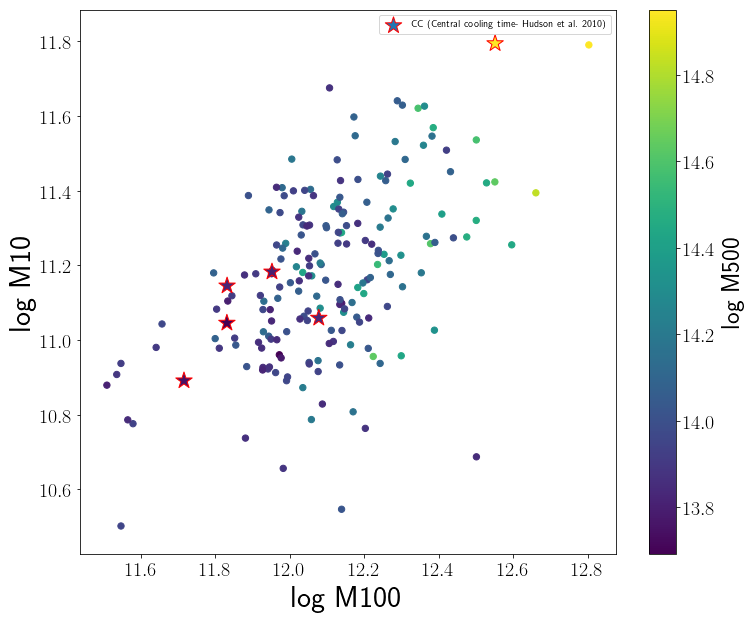

In [20]:
plt.figure(figsize=[12,10])
plt.tick_params(axis='both', which='major', labelsize=20)

all_gals = plt.scatter(m100,m10, c=np.log10(M500), s=1)
non_CC = plt.scatter(m100[~CC_mask2],m10[~CC_mask2], c=np.log10(M500)[~CC_mask2], s=40)

plt.scatter(m100[CC_mask2],m10[CC_mask2], marker='*', c=np.log10(M500)[CC_mask2], s=300, edgecolors='r',
            linewidths=1, label='CC (Central cooling time- Hudson et al. 2010)')


# plt.scatter(m100[CC_mask6],m10[CC_mask6], c=np.log10(M500)[CC_mask6], s=50, edgecolors='r',
#             linewidths=1, label='CC (Cuspiness - Hudson et al. 2010)')


cb = plt.colorbar(all_gals)
cb.set_label('log M500', size=25)
cb.ax.tick_params(labelsize=20) 

plt.xlabel('log M100', fontsize=30)
plt.ylabel('log M10', fontsize=30)

plt.legend()

plt.show()

In [16]:
# - Whether a cluster is a CC or not depends on: i) the chosen criteria and ii) the 
#   chosen threshold. These vary wildly depending on the study. For each projection 
#   there are 6 criteria:

#   --------------------------------------------------------------------------------
#   Name                       Attribute in file [units]  Threshold    Reference
#   --------------------------------------------------------------------------------
#   Central electron density   Ne_0p012R500_Sim [cm^-3]   CC > 1.5e-2  Hudson 2010
#   Central cooling time       Tcool_0p012R500_Sim [Gyr]  CC < 1       Hudson 2010
#   Central entropy            Kcen_Sim [kev cm^2]        CC < 30      McDonald 2013
#   Concentration (physical)   Csb_phys_Sim               CC > 0.155   Santos 2008
#   Concentration (scaled)     Csb_scal_Sim               CC > 0.5     Maughan 2012
#   Cuspiness                  Alpha_0p04R500_Sim         CC > 0.75    Hudson 2010
#   --------------------------------------------------------------------------------

## 2D histogram

In [ ]:
# use hexbin to get array of CC and array of all and divide one by the other to get array of fraction of CC